# Monte-Carlo

In [31]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML
import numba
from numba import jit

## Exercice 1:

Python has many built-in random number generators. Check-out the documentation and try a couple of ones. In particular, compare the output of the built-in expontential and Gaussian generators with the versions implemented above.

Commençons à tester 3 façon différentes de générer une gaussienne. Les deux premières sont des commandes plus directe pour générer une gaussienne (avec plus ou moins de souplesse) tandis que la dernière est une approximation plus importante car n'est théoriquement valide que lorsque le théorème de Moivre-Laplace le permet.

#### 1) numpy.random.standard_normal
Notre première commande nous permet de générer une loi normale standard ($\mu=0$ et $\sigma=1$). C'est la commande fitant le mieux avec une gaussienne, cependant elle est très spécifique et peut être très vite superflu si nous avons besoin de manipuler des distributions de forme différente

(-5.0, 5.0)

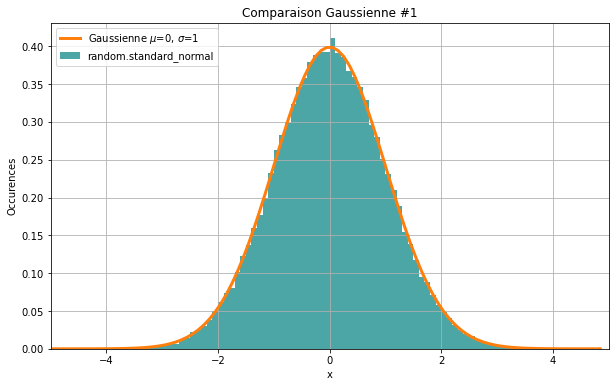

In [25]:
#------------------------------------ Préparation des histogrammes
binwidth=0.1 #Défini la largeur des colonnes
bins=np.arange(-5.,5., binwidth) #Défini les valeurs sur lequel notre commande va s'exécuter (en précisant le pas avec binwidth)
xc = bins[:-1] + binwidth/2 # Centrons nos bins
Standgau=np.random.standard_normal(100000) #Par défaut moyenne=0 et sigma=1

#------------------------------------ Graphe
plt.figure(figsize=(10,6))
plt.title('Comparaison Gaussienne #1')
plt.xlabel('x')
plt.ylabel('Occurences')

plt.hist(Standgau,bins=np.arange(-5.,5., binwidth),density=True, color="teal", alpha=0.7, label='random.standard_normal')
plt.plot(xc,np.exp(-0.5*(xc)**2)/(np.sqrt(2*np.pi)),label='Gaussienne $\\mu$=0, $\\sigma$=1',
            color='C1', linestyle='-',lw=3)

plt.legend(loc='upper left')
plt.grid()
plt.xlim(-5.,5.)

#### 2) numpy.random.normal
Cette commande permet de générer des gaussiennes de manière général. Il suffit de fournir une moyenne et un écart-type. Celui-ci est moins précis que numpy.random.standard_normal mais offre plus de souplesse n'étant pas limité à la normale standard.

(-5, 5)

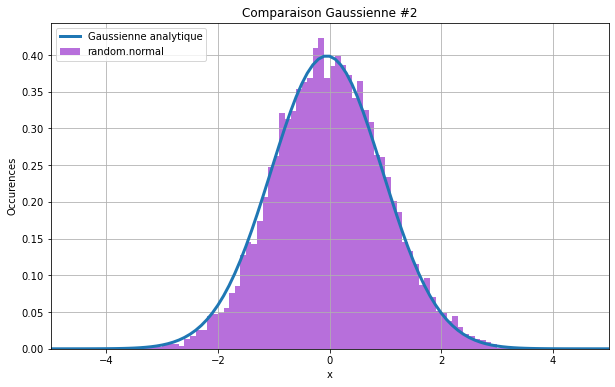

In [27]:
#------------------------------------ Préparation des histogrammes
nx=101
xi=np.linspace(-5.,5.,nx)

binwidth=0.1 #Défini la largeur des colonnes
bins=np.arange(-5.,5.2, binwidth) #Défini les valeurs sur lequel notre commande va s'exécuter (en précisant le pas avec binwidth)
xc = bins[:-1] + binwidth/2 # Centrons nos bins

#------------------------------------ Gaussienne
mu, sigma = 0, 1
normal = np.random.normal(mu, sigma, size=10000)
defin= np.exp(-0.5*((xc - mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)


#------------------------------------ Graphe
plt.figure(figsize=(10,6))
plt.title('Comparaison Gaussienne #2')
plt.xlabel('x')
plt.ylabel('Occurences')

plt.plot(xi, defin, label='Gaussienne analytique',
            color='C0', linestyle='-',lw=3)
plt.hist(normal, bins=bins, density=True, color="darkorchid", alpha=0.7, label='random.normal')

plt.legend(loc='upper left')
plt.grid()
plt.xlim(-5,5)

#### 3) numpy.random.binomial
Notre dernière routine est un générateur de distribution binomiale. Celle-ci peut également servir indirectement dans le cas spécifique où les hypothèses du théorème de Moivre-Laplace sont respectés ($\to np(1-p) \geq 10$) ainsi que les conditions du théorème central limite dont est dérivé le théorème de Moivre-Laplace, c'est-à-dire que les variables aléatoires sont indépendants et identiquement distribués.

Nous allons utiliser cette routine et la comparer avec la "numpy.random.normal" pour montrer la convergence de notre distribution binomiale.

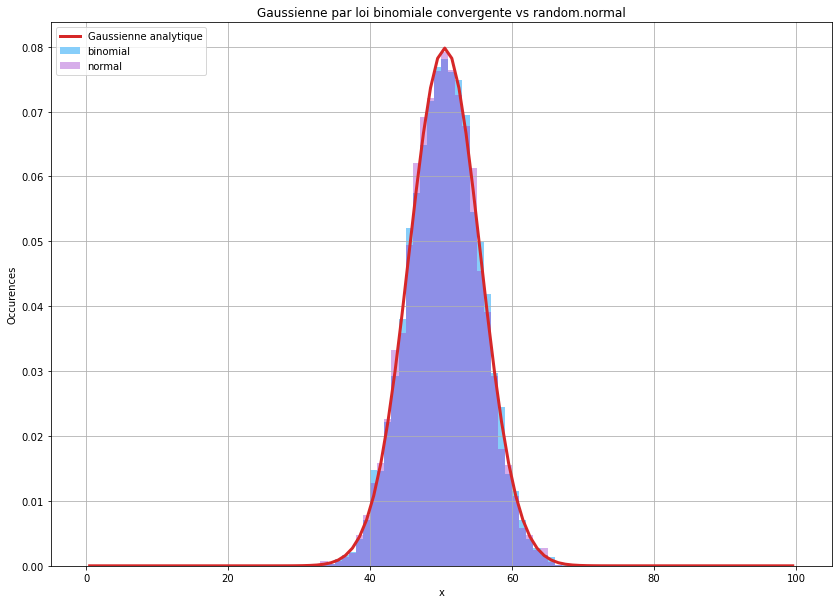

In [3]:
#------------------------------------ Paramètres
nx=101
xi=np.linspace(0.,100.,nx)
binwidth=1 #Défini la largeur des colonnes
bins=np.arange(0.,101., binwidth)
xc=(bins[:-1])+binwidth/2

#------------------------------------ Préparations des Gaussiennes
mu, sigma = 50.5, 5 #correspond à mu=n*p et sigma = p* sqrt(n) /!\ Nous avons décalé les colonnes
mooc = np.exp(-0.5*((xc - mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)
binom = np.random.binomial(n=100, p=0.5, size=10000)
gauss = np.random.normal(mu, sigma, size=10000)

#------------------------------------ Graphe
plt.figure(figsize=(14,10))
plt.title('Gaussienne par loi binomiale convergente vs random.normal')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.plot(xc, mooc, label='Gaussienne analytique',
            color='C3', linestyle='-',lw=3)
plt.hist(binom, bins=bins, density=True, color="lightskyblue",label='binomial')
plt.hist(gauss, bins=bins, density=True, color="darkorchid", alpha=0.4, label='normal');
plt.legend(loc='upper left')
plt.grid()

Testons maintenant, deux générateurs d'exponentiels: le random.standard.exponential et le random.exponential. 
Comme précédemment, la première est une version "standardisée" tandis que la seconde nous laisse un peu plus de souplesse.

(0.0, 5.0)

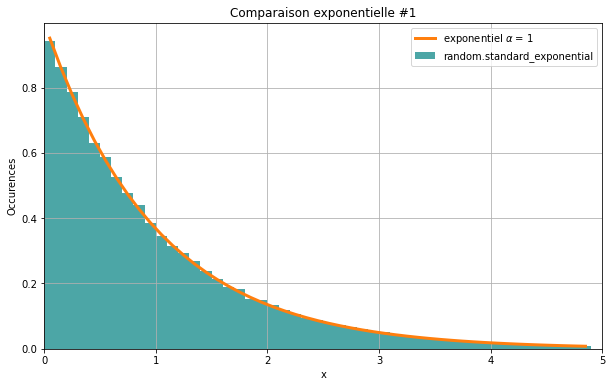

In [7]:
#------------------------------------------- Histogramme
binwidth=0.1 #Défini la largeur des colonnes
bins=np.arange(0.,5., binwidth) #Défini les valeurs sur lequel notre commande va s'exécuter (en précisant le pas avec binwidth)
xc = bins[:-1] + binwidth/2 # Centrons nos bins

#------------------------------------------- Exponentiel
Standexp=np.random.standard_exponential(100000) #Par défaut alpha=1

#------------------------------------------- Graphe
plt.figure(figsize=(10,6))
plt.title('Comparaison exponentielle #1')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.hist(Standexp,bins=np.arange(0.,5., binwidth),density=True, color="teal", alpha=0.7, label='random.standard_exponential')
plt.plot(xc,1*np.exp(-1*xc),label='exponentiel $\\alpha$ = 1',
            color='C1', linestyle='-',lw=3)
plt.legend(loc='upper right')
plt.grid()
plt.xlim(0.,5.)

La prochaine commande est plus souple et nous permet de définir notre paramètre alpha comme bon nous semble.
Notons que la définition est légèrement différente de celle utilisé lors du mooc, nous allons devoir réadapter
la formule analytique par:
    
$$
p(x,\beta)=\frac{1}{\beta}\cdot\exp(-\frac{x}{\beta})
$$

(0.0, 20.0)

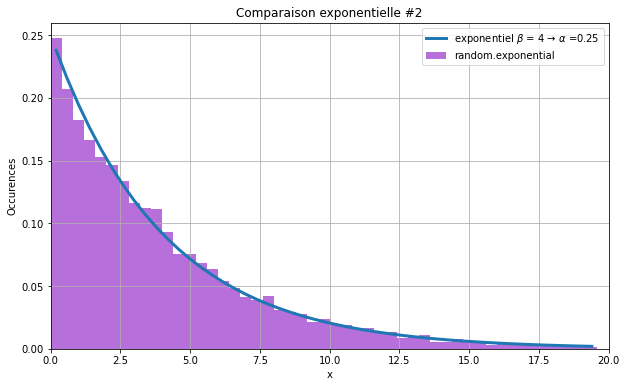

In [8]:
#------------------------------------------- Graphe
binwidth=0.4 #Défini la largeur des colonnes
bins=np.arange(0.,20., binwidth) #Défini les valeurs sur lequel notre commande va s'exécuter (en précisant le pas avec binwidth)
xc = bins[:-1] + binwidth/2 # Centrons nos bins

#------------------------------------------- Exponentiel
beta=4
exp=np.random.exponential(beta,10000)

#------------------------------------------- Graphe
plt.figure(figsize=(10,6))
plt.title('Comparaison exponentielle #2')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.hist(exp,bins=np.arange(0.,20., binwidth),density=True, color="darkorchid", alpha=0.7, label='random.exponential')
plt.plot(xc,np.exp(-xc/beta)/beta,label='exponentiel $\\beta$ = 4 $\\to$ $\\alpha$ =0.25',
            color='C0', linestyle='-',lw=3)
plt.legend(loc='upper right')
plt.grid()
plt.xlim(0.,20.)

## Exercice 2:
Another popular method to generate numbers according to the Gaussian distribution is known as the Box–Muller algorithm. Look up its definition on the web, try to implement it and verify that it works as expected.

Encodons la méthode de Box-Muller, cette méthode permet de générer une loi normale standard à partir d'une distribution uniforme.

(-5.0, 5.0)

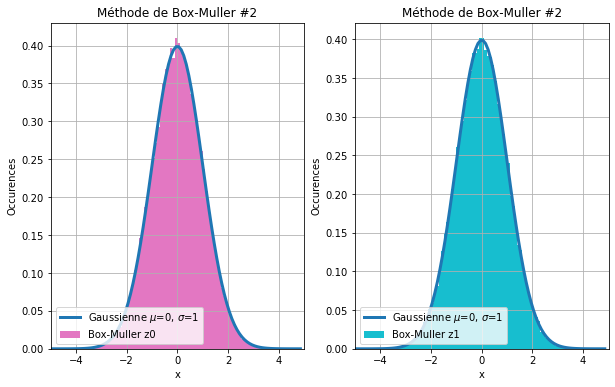

In [88]:
#--------------------------------------------- Histogrammes
binwidth=0.1
bins=np.arange(-5,5, binwidth)
xc = bins[:-1] + binwidth/2 # Centrons nos bins

#--------------------------------------------- Box-Muller définitions
N = 100000

u1 = np.random.random_sample(N) #Distribution uniforme 1
u2 = np.random.random_sample(N) #Distribution uniforme 2

z0 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2) #Loi normale standard 1
z1 = np.sqrt(-2*np.log(u2))*np.sin(2*np.pi*u1) #Loi normale standard 2


#--------------------------------------------- Graphe Box-Muller z0
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title('Méthode de Box-Muller #2')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.hist(z0,bins,density=True, label='Box-Muller z0',
            color='C6', linestyle='-',lw=3)# Plots de z0
plt.plot(xc,np.exp(-0.5*(xc)**2)/np.sqrt(2*np.pi),label='Gaussienne $\\mu$=0, $\\sigma$=1',
            color='C0', linestyle='-',lw=3)
plt.legend(loc='lower left')
plt.grid()
plt.xlim(-5.,5.)

#--------------------------------------------- Graphe Box-Muller z1
plt.subplot(122)
plt.title('Méthode de Box-Muller #2')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.hist(z1,bins,density=True, label='Box-Muller z1',
            color='C9', linestyle='-',lw=3)# Plots de z1
plt.plot(xc,np.exp(-0.5*(xc)**2)/np.sqrt(2*np.pi),label='Gaussienne $\\mu$=0, $\\sigma$=1',
            color='C0', linestyle='-',lw=3)
plt.legend(loc='lower left')
plt.grid()
plt.xlim(-5.,5.)

## Exercice 3
Add as systematic contribution to the displacement $dx$,

$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$

where $c$ is a constant and analyse the behaviour of the random walk. Can you guess the corresponding equation governing the evolution of the density in this case? What is the analitical solution for an initial Gaussian distribution?

Remarquons tout d'abord que que la contribution cdt est indépendant de second terme du membre de droit de notre équation. Ainsi, cdt ne fait que simplement translater notre gaussienne de manière constante à chaque élément dt.

Notre moyenne aura donc évolué, à un l'instant t donné, de $$\mu_t = \mu + ct$$

Notre $\sigma$, quant à lui, reste inchangé et est donc identique à sa forme sans terme de translation.
$$\to \sigma_t = \sigma^2 + 2\alpha t$$

Ainsi, notre densité correspond à 

$$
\rho(x,t)=\frac{1}{\sigma_t\sqrt{2\pi}}\cdot \exp{-\frac{(x-\mu)^2}{2\sigma^2}} \quad (1)
$$

Posons à présent 
$$y=x-ct$$

$$ \Rightarrow dy=\sqrt{2\alpha dt}\cal{N(0,1)}$$


L'équation d'évolution de la densité est donc le même que pour le processus sans terme de translation
\begin{align}
\frac{\partial \rho}{\partial t}& =\alpha \frac{\partial^2 \rho}{\partial y^2}\\
 & =\alpha \left(\frac{\partial}{\partial x}-\frac{1}{c}\frac{\partial}{\partial t}\right)^2 \cdot\rho
\end{align}


La marche aléatoire évolue donc ainsi:

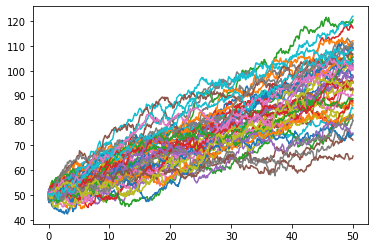

In [10]:
#--------------------------------------------- Paramètres
T, nt = 50.0, 500
dt=T/nt
alpha, c = 2, 1
t, x = np.arange(0,T+dt,dt), np.empty([nt+1,100000])
x[0]=x0

#--------------------------------------------- Loi normale
sigma, mu = 1.0, 50.0
x0=np.random.normal(mu,sigma,100000)

#--------------------------------------------- Marche aléatoire
for i in range(nt):
    x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1,100000)+c*dt

for i in range(50):
    plt.plot(t,x[:,i])

Remarquons que le terme de translation fait "dériver" notre marche aléatoire vers les x positif. La constante c nous permet donc de modifier le sens de la marche (en fonction de son signe) et son intensité si nous prenons $c \neq 1$. Bien évidemment c=0, nous redonne une marche aléatoire comme vu durant le mooc.

Enfin, remarquons que notre solution est, à nouveau, assimilable à une gaussienne. Plotons en histogramme les positions obtenues lors de la dernière phase de la simulation et comparons là avec la gaussienne prédit en $(1)$

In [89]:
#---------------------------------- Définition moyenne et écart-type
mut=mu+c*T
sigmat=2*alpha*T+sigma**2

#---------------------------------- Générons les colonnes de l'histogramme
binwidth=0.5
bins=np.arange(-50+mut,50+mut,binwidth)
bins = bins + binwidth/2
bin_centers = bins[:-1]+binwidth/2

#---------------------------------- Plot
plt.figure(figsize=(10,6))
plt.title('Comparaison simulation - solution analytique')
plt.xlabel('x')
plt.ylabel('Occurences (normée)')

plt.hist(x[nt],bins,density=True,label='Simulation')
plt.plot(bin_centers, np.exp(-(bin_centers-mut)**2/(2.0*sigmat))/np.sqrt(2*np.pi*sigmat),label='Solution analytique',
            color='C4', linestyle='-',lw=3)

plt.legend(loc='upper right')
plt.grid()

NameError: name 'c' is not defined

## Exercice 4
Simulate the following random walk with a 'friction' term:

$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}
$$

Check that the distribution reaches a steady state for $t\rightarrow \infty$. Can you guess the corresponding equation governing the evolution of the density in this case? What is analytical form for the steady state? These last two questions are not easy!

## Exercice 5
Check that this (the fact that the Metropolis algortithm generated the right proportion of states) is not a coincidence and that the metropolis algorithm gives the correct ratio of "ups" and "downs" for different lattice configurations. You may use the following routine to generate different ones with random initial dipole orientations.

In [32]:
@jit
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = np.random.randint(0,2,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

In [33]:
@jit
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

In [34]:
@jit
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (np.random.random_sample()<np.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

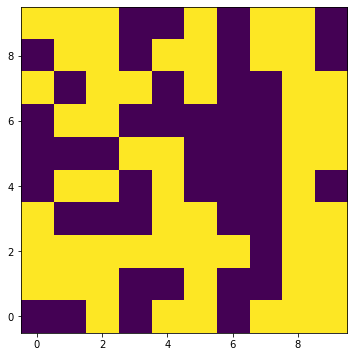

In [7]:
nx=10
ny=10
r = initial_state(nx,ny)
alpha=0.1
#--------------------------- graphe
plt.figure(figsize=(6,6))
plt.imshow(r,interpolation="none",origin='lower')

In [8]:
print(energy_at_site(r,alpha,r[5,5],5,5))

-0.2


Nous allons maintenant créer une routine permettant de générer n fois la procédure précédent et allons print le ratio pour chaque itération.

In [35]:
@jit
def check_ratio(n,NMC):
    nx, ny = 10, 10
    alpha = 0.1
    
    theo, ratios = np.empty(n), np.empty(n)
    
    for i in range(n):
        sp=initial_state(nx,ny)
        
        energy1 = energy_at_site(sp,alpha,-1,5,5)
        energy_mod = energy_at_site(sp,alpha, 1,5,5)

        states = np.empty(NMC)
        states[0]=sp[5,5]

        for m in range(0,NMC):
            
            metropolis_at_site(sp,alpha,5,5)
            states[m]=sp[5,5]

        ups = np.extract(states==1, states).size
        downs = NMC - ups
        theo[i] = np.exp(energy1-energy_mod)
        ratios[i] = ups/downs
    return [theo,ratios]

In [10]:
[theo,ratios]= check_ratio(10,100000)
print("Les valeurs théoriques attendues sont:\n", theo,"\n Les ratios obtenus quant à eux sont:")
print(ratios)

Les valeurs théoriques attendues sont:
 [0.67032005 1.         1.4918247  1.4918247  1.         0.67032005
 0.44932896 1.         1.4918247  1.        ] 
 Les ratios obtenus quant à eux sont:
[0.6697836  1.         1.4958195  1.49463653 1.         0.67319212
 0.44839373 1.         1.49227395 1.        ]


## Question 6
Perform a series of runs with $\alpha \in [0,1]$ and plot the average energy of the system and its magnetisation as a function of 𝛼. Estimate the critical value of 𝛼 at which the phase transition occurs. Is it compatible with Onsager's exact solution for the system?

In [36]:
@jit
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = np.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=np.random.randint(0,nx)
            iy=np.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

In [12]:
nx, ny = 10, 10
NMC = 20

alpha=0.1
sp = np.ones([nx,ny])
states = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [13]:
nx, ny = 100, 100
NMC = 100


alphas=np.linspace(0,1,11)
states=np.empty([nx,ny])

fig = plt.figure(figsize=(6,3))

    
sp = np.ones([nx,ny])
states_0 = ising_model_metropolis(sp, NMC, nx, ny, alphas[0])
plt.subplot(3, 4, 1)
img0 = plt.imshow(states_0[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_1 = ising_model_metropolis(sp, NMC, nx, ny, alphas[1])
plt.subplot(3, 4, 2)
img1 = plt.imshow(states_1[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_2 = ising_model_metropolis(sp, NMC, nx, ny, alphas[2])
plt.subplot(3, 4, 3)
img2 = plt.imshow(states_2[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_3 = ising_model_metropolis(sp, NMC, nx, ny, alphas[3])
plt.subplot(3, 4, 4)
img3 = plt.imshow(states_3[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_4 = ising_model_metropolis(sp, NMC, nx, ny, alphas[4])
plt.subplot(3, 4, 5)
img4 = plt.imshow(states_4[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_5 = ising_model_metropolis(sp, NMC, nx, ny, alphas[5])
plt.subplot(3, 4, 6)
img5 = plt.imshow(states_5[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_6 = ising_model_metropolis(sp, NMC, nx, ny, alphas[6])
plt.subplot(3, 4, 7)
img6 = plt.imshow(states_6[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_7 = ising_model_metropolis(sp, NMC, nx, ny, alphas[7])
plt.subplot(3, 4, 8)
img7 = plt.imshow(states_7[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_8 = ising_model_metropolis(sp, NMC, nx, ny, alphas[8])
plt.subplot(3, 4, 9)
img8 = plt.imshow(states_8[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_9 = ising_model_metropolis(sp, NMC, nx, ny, alphas[9])
plt.subplot(3, 4, 10)
img9 = plt.imshow(states_9[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_10 = ising_model_metropolis(sp, NMC, nx, ny, alphas[10])
plt.subplot(3, 4, 11)
img10 = plt.imshow(states_10[0],interpolation="none",origin='lower',vmin=-1, vmax=1)


def animate(j):
    img0.set_array(states_0[j])
    img1.set_array(states_1[j])
    img2.set_array(states_2[j])
    img3.set_array(states_3[j])
    img4.set_array(states_4[j])
    img5.set_array(states_5[j])
    img6.set_array(states_6[j])
    img7.set_array(states_7[j])
    img8.set_array(states_8[j])
    img9.set_array(states_9[j])
    img10.set_array(states_10[j])

    
anim = animation.FuncAnimation(fig, animate, frames=NMC, interval=200)
plt.close()
HTML(anim.to_html5_video())

In [37]:
@jit
def init_energy(sp,alpha):
    """ Calcule l'energie d'une grille de spins.
   
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    alpha  : reél
        constante de couplage J/(kb*T)
    
    Returns:
    -------
    Energie_tot/2 = energie totale de la configuration divisée par deux
    car on somme sur les paires de spins
    """
    nx=ny=len(sp[0])
    E_tot= 0
    for m in range(nx):
        for l in range(ny):
            sigma=sp[l,m]
            E_tot=energy_at_site(sp,alpha,sigma,m,l)+E_tot
    return E_tot/2 

def average_energy(states,alpha,NMC):
    """ Calcule l'energie moyenne d'une succéssion de configurations, pour 
     un même alpha.
    
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    alpha  : reél
        constante de couplage J/(kb*T)
    NMC : int
        Nombre d'itérations faites par l'algorithme de Metropolis.
    
    Returns:
    -------
    en_moy_norm = liste des énergies moyennes pour chaque suite d'états.
    """
    
    e_moy_norm, e_moy_non_norm = np.empty(NMC+1), np.empty(NMC+1)
    e_moy_norm[0], e_moy_non_norm[0] = init_energy(states[0],alpha), init_energy(states[0],alpha)
    
    for n in range(1,NMC+1):
        e_moy_non_norm[n] = (init_energy(states[n],alpha) + e_moy_non_norm[n-1])
    
    for m in range(1,NMC+1):
        e_moy_norm[m]=(e_moy_non_norm[m]/(m+1))
        
    return e_moy_norm

In [38]:
@jit
def init_magn(sp):
    """ Calcule la magnétisation d'une grille de spins.
   
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    
    Returns:
    -------
    magn_tot = magnétisation totale de la configuration.
    """
    nx=ny=len(sp[0])
    magn_tot=0.
    for m in range(nx):
        for l in range(ny):
            sigma=sp[l,m]
            magn_tot=sigma+magn_tot
    return magn_tot 

def average_magn(states,NMC):
    """ Calcule la magnétisation moyenne d'une succéssion de configurations.
    
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    NMC : int
        Nombre d'itérations faites par l'algorithme de Metropolis.
    
    Returns:
    -------
    magn_moy_norm = liste des magnétisations moyennes pour chaque suite d'états.
    """
    
    magn_moy_norm, magn_moy_non_norm = np.zeros(NMC+1), np.zeros(NMC+1)
    magn_moy_norm[0], magn_moy_non_norm[0] = init_magn(states[0]), init_magn(states[0])
    
    for n in range(1,NMC+1):
        magn_moy_non_norm[n] = (init_magn(states[n]) + magn_moy_non_norm[n-1])
    
    m=1    
    for m in range(1,NMC+1):
        magn_moy_norm[m]= (magn_moy_non_norm[m])/(m+1)
        
    return magn_moy_norm

Mettons en graphe les valeurs de l'énergie ainsi que celles de la magnétisation. Nous rajoutons également la valeur théorique de l'alpha critique de Onsager: $\alpha_{critique}=0.4406868$. Celle-ci nous servira d'indicateur théorique pour nos graphique.

Nous avons caclulé cette valeur à partir de la température critique ( température de Curie, c'est-à-dire la température à partir de laquelle la magnétisation va s'annuler).

$$T_c=\frac{2J}{k_b ln(1+\sqrt{2})}$$

dès lors, $\alpha = \frac{J}{K_B T}$ implique que notre alpha critique devient 

\begin{align}
\alpha_{crit}&=\frac{ln(1+\sqrt{2})}{2}\\
                 &=0.44068679351
\end{align}

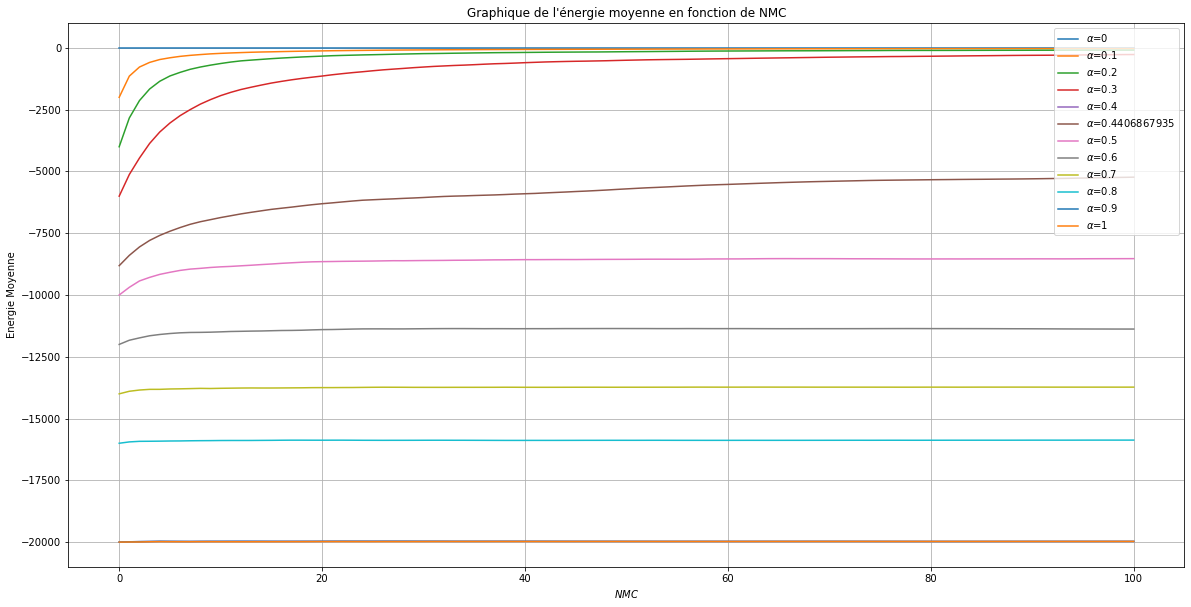

In [41]:
NMC_grid = np.arange(0,101,1)
plt.figure(figsize=(20,10))
plt.title("Graphique de l'énergie moyenne en fonction de NMC")
plt.xlabel('$NMC$')
plt.ylabel("Energie Moyenne")


#Nous récupérons les states_i et les alphas générés précédemment.
sp=np.ones([nx,ny])
states_0=ising_model_metropolis(sp,NMC,nx,ny,alphas[0])
energy_0, magn_0 = average_energy(states_0,alphas[0],NMC),average_magn(states_0,NMC)
plt.plot(NMC_grid,energy_0,label='$\\alpha$=0')

sp=np.ones([nx,ny])
states_1=ising_model_metropolis(sp,NMC,nx,ny,alphas[1])
energy_1, magn_1 = average_energy(states_1,alphas[1],NMC),average_magn(states_1,NMC)
plt.plot(NMC_grid,energy_1,label='$\\alpha$=0.1')

sp=np.ones([nx,ny])
states_2=ising_model_metropolis(sp,NMC,nx,ny,alphas[2])
energy_2, magn_2 = average_energy(states_2,alphas[2],NMC),average_magn(states_2,NMC)
plt.plot(NMC_grid,energy_2,label='$\\alpha$=0.2')

sp=np.ones([nx,ny])
states_3=ising_model_metropolis(sp,NMC,nx,ny,alphas[3])
energy_3, magn_3 = average_energy(states_3,alphas[3],NMC),average_magn(states_3,NMC)
plt.plot(NMC_grid,energy_3,label='$\\alpha$=0.3')

sp=np.ones([nx,ny])
states_4=ising_model_metropolis(sp,NMC,nx,ny,alphas[4])
energy_4, magn_4 = average_energy(states_4,alphas[4],NMC),average_magn(states_4,NMC)
plt.plot(NMC_grid,energy_4,label='$\\alpha$=0.4')

alpha = 0.44068679351   #alpha critique de Onsanger
sp=np.ones([nx,ny])
states_Onsanger=ising_model_metropolis(sp,NMC,nx,ny,alpha)
energy_Onsanger, magn_Onsanger = average_energy(states_Onsanger,alpha,NMC), average_magn(states_Onsanger,NMC)
plt.plot(NMC_grid,energy_Onsanger,label='$\\alpha$=0.4406867935')

sp=np.ones([nx,ny])
states_5=ising_model_metropolis(sp,NMC,nx,ny,alphas[5])
energy_5, magn_5 = average_energy(states_5,alphas[5],NMC),average_magn(states_5,NMC)
plt.plot(NMC_grid,energy_5,label='$\\alpha$=0.5')

sp=np.ones([nx,ny])
states_6=ising_model_metropolis(sp,NMC,nx,ny,alphas[6])
energy_6, magn_6 = average_energy(states_6,alphas[6],NMC),average_magn(states_6,NMC)
plt.plot(NMC_grid,energy_6,label='$\\alpha$=0.6')

sp=np.ones([nx,ny])
states_7=ising_model_metropolis(sp,NMC,nx,ny,alphas[7])
energy_7, magn_7 = average_energy(states_7,alphas[7],NMC),average_magn(states_7,NMC)
plt.plot(NMC_grid,energy_7,label='$\\alpha$=0.7')

sp=np.ones([nx,ny])
states_8=ising_model_metropolis(sp,NMC,nx,ny,alphas[8])
energy_8, magn_8 = average_energy(states_8,alphas[8],NMC),average_magn(states_8,NMC)
plt.plot(NMC_grid,energy_8,label='$\\alpha$=0.8')

sp=np.ones([nx,ny])
states_9=ising_model_metropolis(sp,NMC,nx,ny,alphas[9])
energy_9, magn_9 = average_energy(states_9,alphas[9],NMC),average_magn(states_9,NMC)
plt.plot(NMC_grid,energy_9,label='$\\alpha$=0.9')

sp=np.ones([nx,ny])
states_10=ising_model_metropolis(sp,NMC,nx,ny,alphas[10])
energy_10, magn_10 = average_energy(states_10,alphas[10],NMC),average_magn(states_10,NMC)
plt.plot(NMC_grid,energy_10,label='$\\alpha$=1')

plt.grid()
plt.legend(loc='upper right')

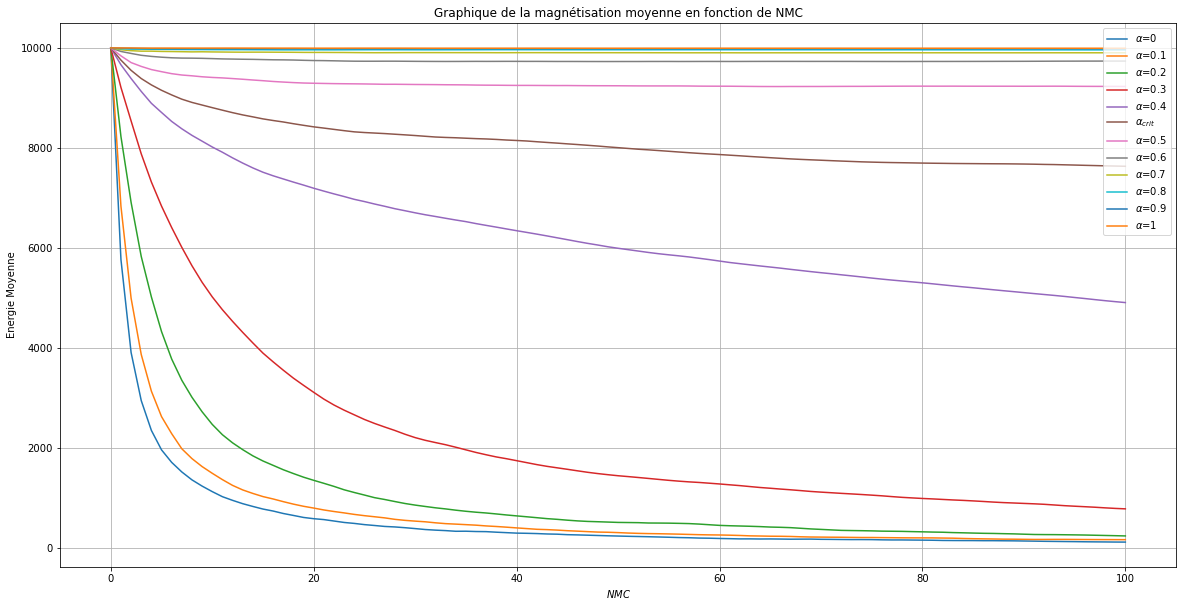

In [64]:
NMC_grid = np.arange(0,101,1)
plt.figure(figsize=(20,10))
plt.title("Graphique de la magnétisation moyenne en fonction de NMC")
plt.xlabel('$NMC$')
plt.ylabel("Energie Moyenne")

plt.plot(NMC_grid, magn_0,label='$\\alpha$=0')
plt.plot(NMC_grid, magn_1,label='$\\alpha$=0.1')
plt.plot(NMC_grid, magn_2,label='$\\alpha$=0.2')
plt.plot(NMC_grid, magn_3,label='$\\alpha$=0.3')
plt.plot(NMC_grid, magn_4,label='$\\alpha$=0.4')
plt.plot(NMC_grid, magn_Onsanger,label='$\\alpha_{crit}$')
plt.plot(NMC_grid, magn_5,label='$\\alpha$=0.5')
plt.plot(NMC_grid, magn_6,label='$\\alpha$=0.6')
plt.plot(NMC_grid, magn_7,label='$\\alpha$=0.7')
plt.plot(NMC_grid, magn_8,label='$\\alpha$=0.8')
plt.plot(NMC_grid, magn_9,label='$\\alpha$=0.9')
plt.plot(NMC_grid, magn_10,label='$\\alpha$=1')

plt.grid()
plt.legend(loc='upper right')

In [39]:
@jit
def alphas_average_energy(states, alpha, NMC, j):
    """ Calcule l'energie moyenne d'une succéssion de configurations, pour 
     un même alpha.
    
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    alpha  : reél
        constante de couplage J/(kb*T)
    NMC : int
        Nombre d'itérations faites par l'algorithme de Metropolis.
    
    Returns:
    -------
    en_moy_norm = liste des énergies moyennes pour chaque suite d'états.
    """
    
    e_moy_norm, e_moy_non_norm = np.empty(NMC-j+2), np.empty(NMC-j+2)
    e_moy_norm[0], e_moy_non_norm[0] = init_energy(states[j-1],alpha), init_energy(states[j-1],alpha)
    
    for n in range(1,NMC-j+2):
        e_moy_non_norm[n] = init_energy(states[n+j-1],alpha) + e_moy_non_norm[n-1]

    for m in range(1,NMC-j+2):
        e_moy_norm[m]=(e_moy_non_norm[m]/(m+1))
        
    return e_moy_norm

def alphas_average_magn(states,NMC,j):
    """ Calcule la magnétisation moyenne d'une succéssion de configurations.
    
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    NMC : int
        Nombre d'itérations faites par l'algorithme de Metropolis.
    
    Returns:
    -------
    magn_moy_norm = liste des magnétisations moyennes pour chaque suite d'états.
    """
    
    magn_moy_norm, magn_moy_non_norm = np.zeros(NMC-j+2), np.zeros(NMC-j+2)
    magn_moy_norm[0], magn_moy_non_norm[0] = init_magn(states[j-1]), init_magn(states[j-1])
    
    for n in range(1,NMC-j+2):
        magn_moy_non_norm[n] = init_magn(states[n+j-1]) + magn_moy_non_norm[n-1]
    
    m=1    
    for m in range(1,NMC-j+2):
        magn_moy_norm[m]= (magn_moy_non_norm[m])/(m+1)
        
    return magn_moy_norm


In [73]:
alphas=np.linspace(0,1,101)
print(alphas)
nx, ny = 100, 100

@jit
def energies_average(nx,ny,alphas):
    energies_average=np.zeros(len(alphas))
    alpha_ener_stock=np.zeros(len(alphas))


    for i in range(0,len(alphas)):
        if alphas[i] <0.6 and alphas[i] > 0.3:
            j=2000
            NMC=2500
        else:
            j=36
            NMC=500
        sp=np.ones((nx,ny))
        states=ising_model_metropolis(sp,NMC,nx,ny,alphas[i])
        alpha_ener_stock=alphas_average_energy(states,alphas[i],NMC,j)
        energies_average[i]=alpha_ener_stock[-1]
    return energies_average

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [74]:
@jit
def magn_average(nx,ny,alphas):
    
    magn_average=np.zeros(len(alphas))
    alpha_magn_stock=np.zeros(len(alphas))

    for i in range(0,len(alphas)):
        if alphas[i] <0.6 and alphas[i] > 0.3:
            j=2000
            NMC=2500
        else:
            j=36
            NMC=500
        sp=np.ones((nx,ny))
        states=ising_model_metropolis(sp,NMC,nx,ny,alphas[i])
        alpha_magn_stock=alphas_average_magn(states,NMC,j)
        magn_average[i]=alpha_magn_stock[-1]
    return magn_average

In [75]:
energies_average = energies_average(nx,ny,alphas)
magn_average = magn_average(nx,ny,alphas)

<ipython-input-73-73df9145e086>:5: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "energies_average" failed type inference due to: Invalid use of type(CPUDispatcher(<function ising_model_metropolis at 0x000002B2BE4A70D8>)) with parameters (array(float64, 2d, C), int64, int64, int64, float64)
 * parameterized
[1] During: resolving callee type: type(CPUDispatcher(<function ising_model_metropolis at 0x000002B2BE4A70D8>))
[2] During: typing of call at <ipython-input-73-73df9145e086> (19)


File "<ipython-input-73-73df9145e086>", line 19:
def energies_average(nx,ny,alphas):
    <source elided>
        sp=np.ones((nx,ny))
        states=ising_model_metropolis(sp,NMC,nx,ny,alphas[i])
        ^

  @jit
<ipython-input-73-73df9145e086>:5: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "energies_average" failed type inference due to: cannot determine Numba type of <class 'numba.dispatcher.

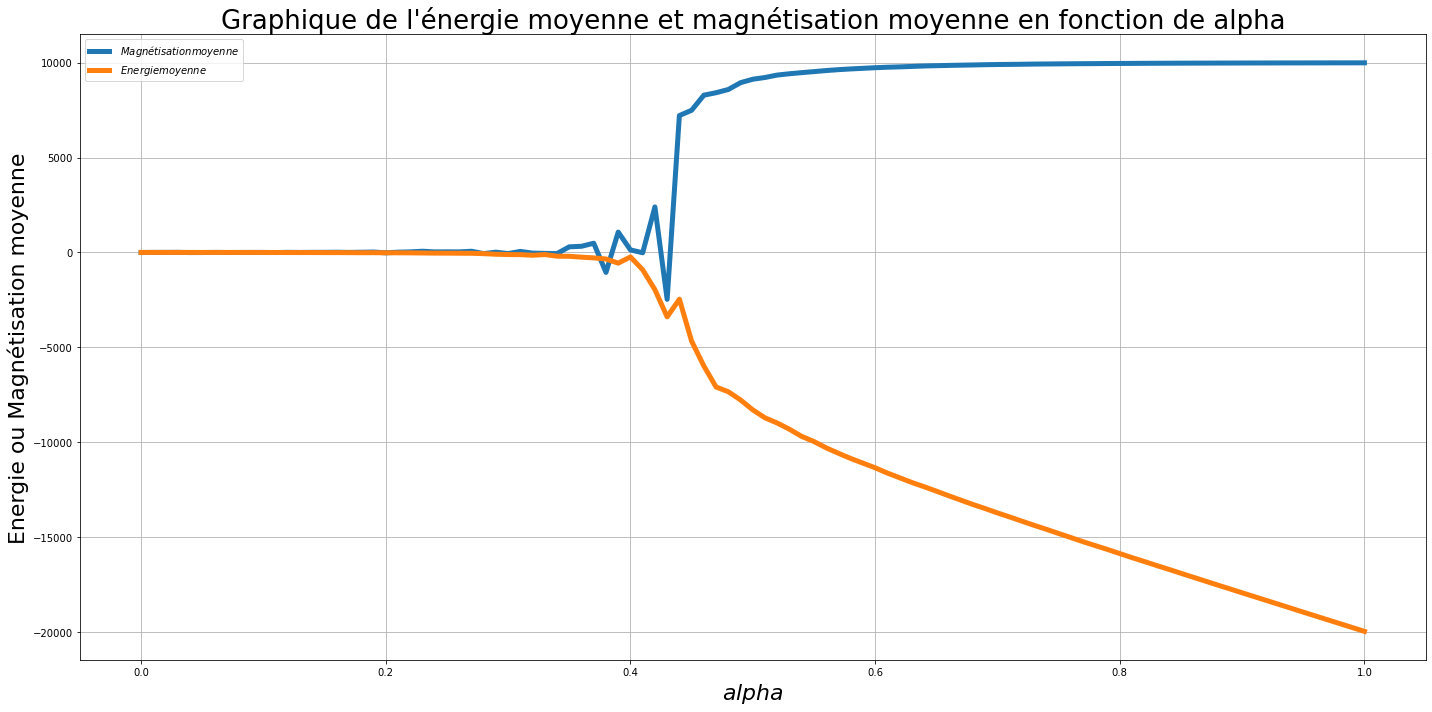

In [76]:
plt.figure(figsize=(20,10))

plt.title("Graphique de l'énergie moyenne et magnétisation moyenne en fonction de alpha", size=26)
plt.xlabel('$alpha$',size=22)
plt.ylabel("Energie ou Magnétisation moyenne",size=22)
plt.grid()

plt.plot(alphas,magn_average,"-",label='$\ Magnétisation moyenne$', lw=5)
plt.plot(alphas,energies_average,"-",label='$\ Energie moyenne$', lw=5)

plt.legend()
plt.tight_layout()


## Question 7

On regarde un cas où les spins sont maintenus sur les bords du système. Il va falloir adapter notre ising model pour en tenir compte. Voyons cela. On commence par définir la fonction qui va mesurer l'énergie entre des spins en interaction avec leurs voisins.

In [90]:
def energy_at_site_boundary(s,alpha,sigma,ix,iy): 
    """
    Calcul de l'énergie pour la position (ix,iy)
    """
    nx = ny = len(s[0])
    s[0,:] = s[nx-1,:] = s[:,ny-1] = s[:,0] = 1 # on fixe le bord toujours égal à des sins ups.

    #on calcule l'énergie pour les coins
    if (ix == 0 and iy == 0):
        energy = -alpha*( s[(ix+1),iy] + s[ix,(iy+1)])
    elif (ix ==0 and iy == ny-1):
        energy = -alpha*( s[(ix+1),iy] + s[ix,(iy-1)] )
    elif (ix == nx-1 and  iy == 0):
        energy = -alpha*( s[(ix-1),iy] + s[ix,(iy+1)] )
    elif (ix == nx-1 and  iy == ny-1):
        energy = -alpha*( s[(ix-1),iy] + s[ix,(iy-1)] )
        
    #on calcule sur les bords     
    elif (ix==0):
         energy = -alpha*( s[(ix+1),iy] + s[ix,(iy-1)] + s[ix,(iy+1)])
    elif (iy==0):
         energy = -alpha*( s[(ix-1),iy] + s[(ix+1),iy] + s[ix,(iy+1)])
    elif (ix==nx-1):
         energy = -alpha*( s[(ix-1),iy] + s[ix,(iy-1)] + s[ix,(iy+1)])
    elif (iy==ny-1):
         energy = -alpha*( s[(ix-1),iy] + s[(ix+1),iy] + s[ix,(iy-1)])

    #sur le reste des points
    else:
        energy = -alpha*sigma*( s[(ix-1),iy] + s[(ix+1),iy] + s[ix,(iy-1)] + s[ix,(iy+1)])

    return energy

In [92]:
def metropolis_at_site_boundary(s,alpha,ix,iy):
    #compare la configuration la plus favorable
    sigma=s[ix,iy]
    e_0 = energy_at_site_boundary(s,alpha,sigma,ix,iy)
    sigma = -sigma
    e_1 = energy_at_site_boundary(s,alpha,sigma,ix,iy)
    
    # la configuration est changée avec une probabilité de metropolis
    if (np.random.random_sample()<np.exp(-(e_1 \
                                               -e_0))):
        if(ix!= 0 and iy!= 0 and ix!= nx-1 and iy!= ny-1):
                        s[ix,iy]=-s[ix,iy]

In [93]:
def ising_model_metropolis_boundary(s, NMC, nx, ny, alpha):
    #implémente ising model 
    states = np.empty([NMC+1,nx,ny])
    states[0] = s.copy()
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=np.random.randint(0,nx)
            iy=np.random.randint(0,ny)    
            metropolis_at_site_boundary(s,alpha,ix,iy) 
        states[i]=s.copy()   
    return states

Vérifions que nos défintitions fonctionnent sur quelques valeurs de $\alpha$

In [94]:
nx=15
ny=15

NMC=100
s = np.ones([nx,ny])
alpha=0.1
states1 = ising_model_metropolis_boundary(s.copy(), NMC, nx, ny, alpha)

alpha=0.2
states2 = ising_model_metropolis_boundary(s.copy(), NMC, nx, ny, alpha)

alpha=0.4
states3 = ising_model_metropolis_boundary(s.copy(), NMC, nx, ny, alpha)

alpha=0.55
states4 = ising_model_metropolis_boundary(s.copy(), NMC, nx, ny, alpha)

alpha=0.7
states5 = ising_model_metropolis_boundary(s.copy(), NMC, nx, ny, alpha)

alpha=1.0
states6 = ising_model_metropolis_boundary(s.copy(), NMC, nx, ny, alpha)

In [95]:
fig = plt.figure(figsize=(6,3))

plt.subplot(1, 3, 1)
img01 = plt.imshow(states1[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

plt.subplot(1, 3, 2)
img02 = plt.imshow(states2[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

plt.subplot(1, 3, 3)
img04 = plt.imshow(states3[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

# Animate
def animate(i):
    img1.set_array(states1[i])
    img2.set_array(states2[i])
    img3.set_array(states3[i])
    
anim = animation.FuncAnimation(fig, animate, frames=NMC, interval=200)
plt.close()
HTML(anim.to_html5_video())

In [96]:
fig = plt.figure(figsize=(6,3))

plt.subplot(1, 3, 1)
img055 = plt.imshow(states4[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

plt.subplot(1, 3, 2)
img07 = plt.imshow(states5[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

plt.subplot(1, 3, 3)
img1 = plt.imshow(states6[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

def animate(i):
    img4.set_array(states4[i])
    img5.set_array(states5[i])
    img6.set_array(states6[i])
    
anim1 = animation.FuncAnimation(fig, animate, frames=NMC, interval=200)
plt.close()
HTML(anim1.to_html5_video())

Maintenant regardons comment on doit définir nos calculs d'énergie et de magnétisme quand la condition au bord est fixée.

In [97]:
def average_energy_boundary(s,alpha):
    """
    Calcul d'une configuration
    """
    Energie_tot= 0
    for m in range(nx):
        for l in range(ny):
            sigma=s[l,m]
            Energie_tot=energy_at_site_boundary(s,alpha,sigma,m,l)+Energie_tot
    return Energie_tot/2

In [98]:
def succ_average_energy_boundary(states,alpha,NMC,j):
    """
    Calcul pour des configurations successives
    """
    en_av = np.empty(NMC+1-j+1)
    en_av[0] =  average_energy_boundary(states[j-1],alpha)
    en_av_nn = np.zeros(NMC+1-j+1)
    en_av_nn[0] = average_energy_boundary(states[j-1],alpha)

    for n in range(1,NMC+1-j+1):
        en_av_nn[n] = (average_energy_boundary(states[n+j-1],alpha) + en_av_nn[n-1])
     
    for m in range(1,NMC+1-j+1):
        en_av[m]=(en_av_nn[m]/(m+1))
        
        
    return en_av

In [99]:
def average_magn_boundary(s):
    """
    Calcul pour une configuration
    """
    nx = ny = len(s[0])
    s[0,:] = s[nx-1,:] = s[:,ny-1] = s[:,0] = 1
    magn_tot = 0
    for m in range(nx):
        for l in range(ny):
            sigma=s[l,m]
            magn_tot=sigma+magn_tot
    return magn_tot

In [100]:
def succ_average_magn_boundary(states,NMC,j):
    """
    
    Calcul pour des configurations successives
    """
    magn_av = np.zeros(NMC+1-j+1)
    magn_av[0] = average_magn_boundary(states[j-1])
    magn_av_nn = np.zeros(NMC+1-j+1)
    magn_av_nn[0] =  average_magn_boundary(states[j-1])
    
    for n in range(1,NMC+1-j+1):
        magn_av_nn[n] = (average_magn_boundary(states[n+j-1]) + magn_av_nn[n-1])
       
    for m in range(1,NMC+1-j+1):
        magn_av[m]= (magn_av_nn[m])/(m+1)
            
    return magn_av_nn

In [101]:
#génère les alphas sur lesquels on va effectuer les tests
list_alpha=np.arange(0,1,0.02)

In [102]:
nx=ny=40
energie_av_f = np.zeros(len(list_alpha))
energie_mav_nn_f = np.zeros(len(list_alpha))


for n in range (len(list_alpha)):
    #on pratique plus d'itérations pour la zone où on risque d'être au alpha critique
    if (list_alpha[n] > 0.3 and list_alpha[n] < 0.6):
        NMC = 2500
        j=2001
    else:
        NMC=535
        j=36
    r = np.ones((nx,ny))
    states = ising_model_metropolis_boundary(r,NMC,nx,ny,list_alpha[n])
    energie_av_nn_f = succ_average_energy_boundary(states,list_alpha[n],NMC,j)
    u=len(energie_av_nn_f)
    energie_av_f[n] = energie_av_nn_f[u-1] #seule l'energie moyenne finale nous interesse, donc on prend le dernier élement de cette liste.

KeyboardInterrupt: 

In [ ]:
magn_av_nn_f = np.zeros(len(list_alpha))
magn_av_f = np.zeros(len(list_alpha))


for n in range (len(list_alpha)):
        #on pratique plus d'itérations pour la zone où on risque d'être au alpha critique
    if (list_alpha[n] > 0.3 and list_alpha[n] < 0.6):
        NMC = 2500
        j=2001
    else:
        NMC=535
        j=36
    r = np.ones((nx,ny))
    states=ising_model_metropolis_boundary(r,NMC,nx,ny,list_alpha[n])
    magn_av_nn_f = succ_average_magn_boundary(states,NMC,j)
    magn_av_f[n] = magn_av_nn_f[u-1]#seule la magnétisation moyenne finale nous interesse, donc on prend le dernier élement de cette liste.

In [ ]:
plt.figure(figsize=(20,10))

plt.title("Graphique de l'énergie moyenne et magnétisation moyenne en fonction de alpha")
plt.xlabel('$alpha$')
plt.ylabel("Unités d'énergie/Magnétisation")

plt.plot(list_alpha,magn_moy_finale,label=r'$\ Magnétisation$')
plt.plot(list_alpha,energie_moy_finale,label=r'$\ Energie$')

plt.legend()
plt.tight_layout()

On a un graphique semblable à celui du cas libre. Les bords n'ont donc qu'une influence négligeable dans le cas considéré. Ce qui est naturele vu que la grille est relativement grande.

## Sources:
- https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_exponential.html?highlight=standard%20random

- https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html?highlight=exponential%20random#numpy.random.exponential

- https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html?highlight=standard%20random

- https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html?highlight=standard%20random

- https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html?highlight=random%20binomial#numpy.random.binomial

- https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_de_Moivre-Laplace

- https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Box-Muller

- https://en.wikipedia.org/wiki/Ising_model#Onsager's_exact_solution